In [2]:
import os
import glob
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

In [3]:
os.chdir("/mnt/lareaulab/reliscu/projects/Chronocell/data/protein_degradation_rates")

In [4]:
file_list = glob.glob("*standardized.csv")
subset_columns = ['Gene', 'Half-life']

df_list = []
for file in [file for file in file_list if "Human" in file]:
    df = pd.read_csv(file)
    study = df['Study'].iloc[0]
    cell_type = df['Cell_type'].iloc[0]
    df = df[subset_columns]
    df = df.rename(columns={"Half-life": f"Half-life_{study}_{cell_type}", 
                            "Cell_type": f"Cell_type_{study}"}) 
    df_list.append(df)

In [5]:
df_list[0].head()

,Gene,Half-life_Boisvert2011_HeLa cells
0,EXOC4,999.000000
1,FAM82A2,999.000000
2,NDUFAF4,314.628167
3,XPOT,999.000000
4,ACOT2,83.151493


In [6]:

# Recursively outer join all DataFrames in df_list on 'Gene'
merged_df = reduce(lambda left, right: pd.merge(left, right, on="Gene", how="outer"), df_list)

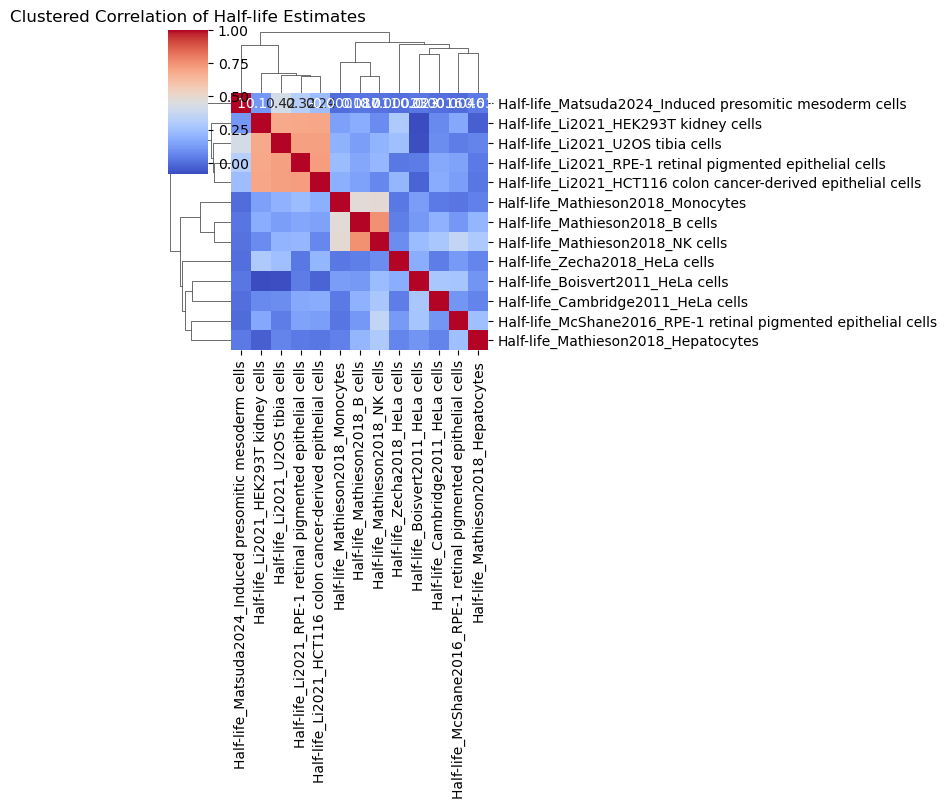

In [7]:
# Visualize correlation between studies

half_life_cols = [col for col in merged_df.columns if "Half-life" in col]
correlation_matrix = merged_df[half_life_cols].corr(method='pearson')

sns.clustermap(correlation_matrix, annot=True, cmap="coolwarm", figsize=(8, 8))
plt.title("Clustered Correlation of Half-life Estimates")  # Optional: won't attach to clustermap directly
plt.show()

In [8]:
# Remove genes with only 1 measurment
half_life_cols = [col for col in merged_df.columns if "Half-life" in col]
filtered_df = merged_df[merged_df[half_life_cols].notna().sum(axis=1) >= 10]

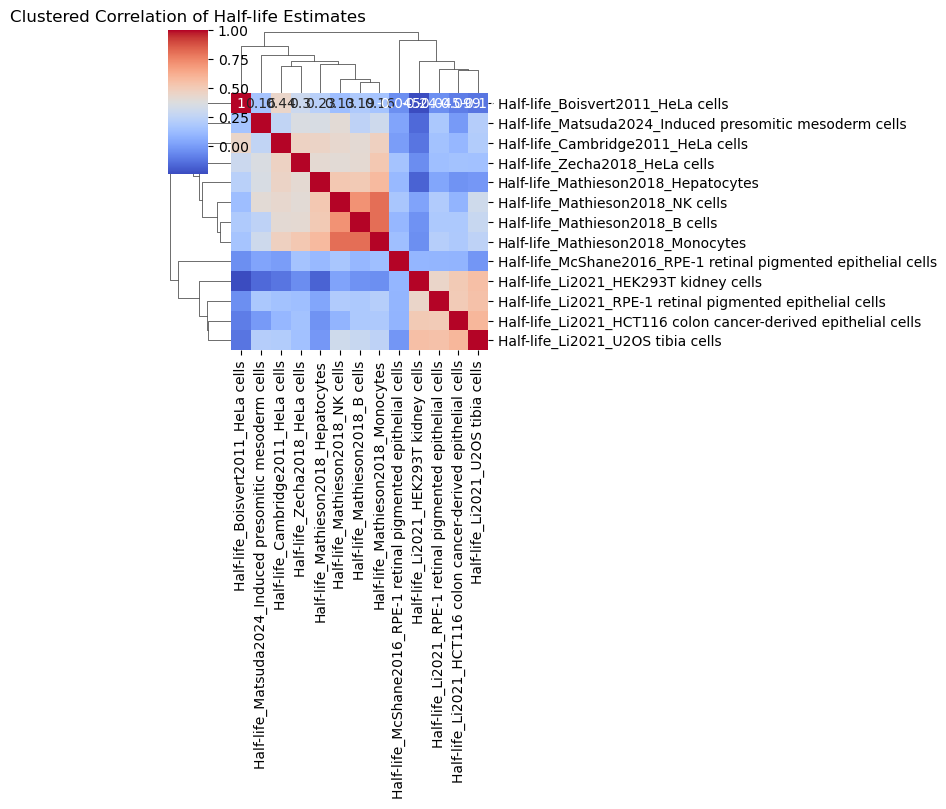

In [9]:
half_life_cols = [col for col in filtered_df.columns if "Half-life" in col]
correlation_matrix = filtered_df[half_life_cols].corr(method='pearson')
sns.clustermap(correlation_matrix, annot=True, cmap="coolwarm", figsize=(8, 8))
plt.title("Clustered Correlation of Half-life Estimates")  # Optional: won't attach to clustermap directly
plt.show()

In [10]:
filtered_df.shape

(212, 14)

In [11]:
merged_long_df = filtered_df.melt(id_vars='Gene', value_vars=half_life_cols, var_name='Study', value_name='Half-life')


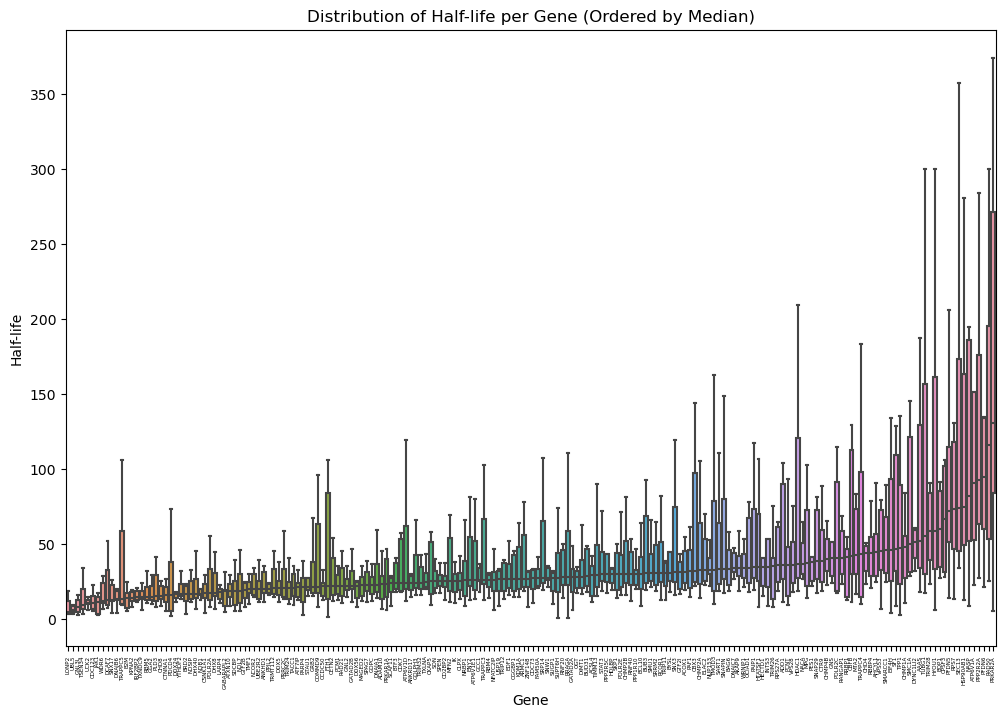

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

medians = merged_long_df.groupby('Gene')['Half-life'].median().sort_values()

plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_long_df, x='Gene', y='Half-life', order=medians.index, showfliers=False)
plt.xticks(rotation=90, fontsize=4)
# plt.yscale('log')
plt.title("Distribution of Half-life per Gene (Ordered by Median)")
plt.show()

In [13]:
p

NameError: name 'p' is not defined